## Importing Libraries 

In [45]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [3]:
df= pd.read_excel('Apllicants Data Task.xlsx',sheet_name='DE_Wind_PV_Prices',index_col='time',parse_dates=True)

## Data Exploration 

In [4]:
df.head()

,hour,de_emsys_wind_onoff_da [in MW],de_emsys_wind_onoff_id [in MW],de_emsys_pv_da [in MW],de_emsys_pv_id [in MW],da h [in EUR/MWh],id_qh_p [in EUR/MWh],id_h_p [in EUR/MWh],rebap [in EUR/MWh]
time,,,,,,,,,
2021-01-01 00:00:00,0,4433,4709,0,0,50.87,44.409894,48.682294,13.33
2021-01-01 00:15:00,0,4286,4507,0,0,50.87,52.139142,48.682294,-0.92
2021-01-01 00:30:00,0,4142,4307,0,0,50.87,50.160255,48.682294,60.26
2021-01-01 00:45:00,0,3991,4181,0,0,50.87,41.342082,48.682294,-12.05
2021-01-01 01:00:00,1,3847,4094,0,0,48.19,64.424013,46.165819,96.09


In [5]:
df.tail()

,hour,de_emsys_wind_onoff_da [in MW],de_emsys_wind_onoff_id [in MW],de_emsys_pv_da [in MW],de_emsys_pv_id [in MW],da h [in EUR/MWh],id_qh_p [in EUR/MWh],id_h_p [in EUR/MWh],rebap [in EUR/MWh]
time,,,,,,,,,
2022-05-31 22:45:00,22,2977,2440,0,0,240.01,224.890766,235.503909,72.75
2022-05-31 23:00:00,23,3033,2464,0,0,227.98,235.245329,220.449556,342.75
2022-05-31 23:15:00,23,2988,2350,0,0,227.98,229.822059,220.449556,280.41
2022-05-31 23:30:00,23,2938,2311,0,0,227.98,216.092075,220.449556,241.76
2022-05-31 23:45:00,23,2901,2124,0,0,227.98,184.100767,220.449556,228.49


In [17]:
#check to find if any missing values
df.isnull().sum()

hour                              0
de_emsys_wind_onoff_da [in MW]    0
de_emsys_wind_onoff_id [in MW]    0
de_emsys_pv_da [in MW]            0
de_emsys_pv_id [in MW]            0
da h [in EUR/MWh]                 0
id_qh_p  [in EUR/MWh]             0
id_h_p  [in EUR/MWh]              0
rebap  [in EUR/MWh]               0
dtype: int64

In [6]:
#check to see that the index column is of the datetime dtype
df.index

DatetimeIndex(['2021-01-01 00:00:00', '2021-01-01 00:15:00',
               '2021-01-01 00:30:00', '2021-01-01 00:45:00',
               '2021-01-01 01:00:00', '2021-01-01 01:15:00',
               '2021-01-01 01:30:00', '2021-01-01 01:45:00',
               '2021-01-01 02:00:00', '2021-01-01 02:15:00',
               ...
               '2022-05-31 21:30:00', '2022-05-31 21:45:00',
               '2022-05-31 22:00:00', '2022-05-31 22:15:00',
               '2022-05-31 22:30:00', '2022-05-31 22:45:00',
               '2022-05-31 23:00:00', '2022-05-31 23:15:00',
               '2022-05-31 23:30:00', '2022-05-31 23:45:00'],
              dtype='datetime64[ns]', name='time', length=49532, freq=None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49532 entries, 2021-01-01 00:00:00 to 2022-05-31 23:45:00
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hour                            49532 non-null  int64  
 1   de_emsys_wind_onoff_da [in MW]  49532 non-null  int64  
 2   de_emsys_wind_onoff_id [in MW]  49532 non-null  int64  
 3   de_emsys_pv_da [in MW]          49532 non-null  int64  
 4   de_emsys_pv_id [in MW]          49532 non-null  int64  
 5   da h [in EUR/MWh]               49532 non-null  float64
 6   id_qh_p  [in EUR/MWh]           49532 non-null  float64
 7   id_h_p  [in EUR/MWh]            49532 non-null  float64
 8   rebap  [in EUR/MWh]             49532 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.8 MB


Info above shows the data extends to 2022. Focus will be on 2021

## Creating the new (2021) dataframe

In [7]:
#new dataframe with only 2021 data 
data = df.loc['2021']

In [9]:
#check the tail to ensure only 2021 data 
data.tail()

,hour,de_emsys_wind_onoff_da [in MW],de_emsys_wind_onoff_id [in MW],de_emsys_pv_da [in MW],de_emsys_pv_id [in MW],da h [in EUR/MWh],id_qh_p [in EUR/MWh],id_h_p [in EUR/MWh],rebap [in EUR/MWh]
time,,,,,,,,,
2021-12-31 22:45:00,22,37367,33010,0,0,5.10,55.370243,59.268274,-25.16
2021-12-31 23:00:00,23,37087,32409,0,0,6.32,86.602119,56.858157,-96.24
2021-12-31 23:15:00,23,36786,32149,0,0,6.32,68.843006,56.858157,-137.24
2021-12-31 23:30:00,23,36484,31755,0,0,6.32,42.875768,56.858157,-29.28
2021-12-31 23:45:00,23,36155,31361,0,0,6.32,28.556247,56.858157,-41.36


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35040 entries, 2021-01-01 00:00:00 to 2021-12-31 23:45:00
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hour                            35040 non-null  int64  
 1   de_emsys_wind_onoff_da [in MW]  35040 non-null  int64  
 2   de_emsys_wind_onoff_id [in MW]  35040 non-null  int64  
 3   de_emsys_pv_da [in MW]          35040 non-null  int64  
 4   de_emsys_pv_id [in MW]          35040 non-null  int64  
 5   da h [in EUR/MWh]               35040 non-null  float64
 6   id_qh_p  [in EUR/MWh]           35040 non-null  float64
 7   id_h_p  [in EUR/MWh]            35040 non-null  float64
 8   rebap  [in EUR/MWh]             35040 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 2.7 MB


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
hour,35040.0,11.500000,6.922285,0.000000,5.750000,11.50000,17.250000,23.000000
de_emsys_wind_onoff_da [in MW],35040.0,13172.991581,10086.192599,114.000000,5467.750000,10195.50000,18749.250000,48217.000000
de_emsys_wind_onoff_id [in MW],35040.0,12954.113527,9860.537118,127.000000,5394.750000,10160.00000,18350.250000,47221.000000
de_emsys_pv_da [in MW],35040.0,5261.937529,8027.697147,0.000000,0.000000,97.00000,8691.500000,35620.000000
de_emsys_pv_id [in MW],35040.0,5329.896290,8219.690217,0.000000,0.000000,94.50000,8694.250000,37011.000000
da h [in EUR/MWh],35040.0,96.849918,73.677793,-69.000000,53.007500,75.48000,112.032500,620.000000
id_qh_p [in EUR/MWh],35040.0,97.550832,75.397445,-129.077523,52.574480,76.05837,117.193532,685.243936
id_h_p [in EUR/MWh],35040.0,97.988495,73.470496,-80.114692,53.829011,76.02269,116.217760,577.429108
rebap [in EUR/MWh],35040.0,101.104792,133.321382,-1998.740000,25.130000,75.92000,140.030000,3804.590000


In [12]:
#overview of what the data looks like 
data.head(3)

,hour,de_emsys_wind_onoff_da [in MW],de_emsys_wind_onoff_id [in MW],de_emsys_pv_da [in MW],de_emsys_pv_id [in MW],da h [in EUR/MWh],id_qh_p [in EUR/MWh],id_h_p [in EUR/MWh],rebap [in EUR/MWh]
time,,,,,,,,,
2021-01-01 00:00:00,0,4433,4709,0,0,50.87,44.409894,48.682294,13.33
2021-01-01 00:15:00,0,4286,4507,0,0,50.87,52.139142,48.682294,-0.92
2021-01-01 00:30:00,0,4142,4307,0,0,50.87,50.160255,48.682294,60.26


## Cummalative Forceasted Energy on Day Ahead and Intraday in 2021 (TWh)

In [13]:
#quater hourly data is first converted to housrly data before cummulation 

cumulative_wind_da_MWh = (data.iloc[:,1]*0.25).sum() / 10**6
cumulative_wind_id_MWh = (data.iloc[:,2]*0.25).sum() / 10**6
cumulative_pv_da_MWh = (data.iloc[:,3]*0.25).sum() / 10**6
cumulative_pv_id_MWh = (data.iloc[:,4]*0.25).sum() / 10**6

print (f'cummulative forcased wind day-ahead for 2021: {cumulative_wind_da_MWh} TWh' )
print (f'cummulative forcased wind inter-day for 2021: {cumulative_wind_id_MWh} TWh' )
print (f'cummulative forcased pv day-ahead for 2021: {cumulative_pv_da_MWh} TWh' )
print (f'cummulative forcased pv inter-day for 2021: {cumulative_pv_id_MWh} TWh' )




cummulative forcased wind day-ahead for 2021: 115.39540625 TWh
cummulative forcased wind inter-day for 2021: 113.4780345 TWh
cummulative forcased pv day-ahead for 2021: 46.09457275 TWh
cummulative forcased pv inter-day for 2021: 46.6898915 TWh


In [22]:
data['search_k']= data.index.time

In [25]:
data_group = data.groupby('search_k').mean()

In [27]:
data_group.index

Index([00:00:00, 00:15:00, 00:30:00, 00:45:00, 01:00:00, 01:15:00, 01:30:00,
       01:45:00, 02:00:00, 02:15:00, 02:30:00, 02:45:00, 03:00:00, 03:15:00,
       03:30:00, 03:45:00, 04:00:00, 04:15:00, 04:30:00, 04:45:00, 05:00:00,
       05:15:00, 05:30:00, 05:45:00, 06:00:00, 06:15:00, 06:30:00, 06:45:00,
       07:00:00, 07:15:00, 07:30:00, 07:45:00, 08:00:00, 08:15:00, 08:30:00,
       08:45:00, 09:00:00, 09:15:00, 09:30:00, 09:45:00, 10:00:00, 10:15:00,
       10:30:00, 10:45:00, 11:00:00, 11:15:00, 11:30:00, 11:45:00, 12:00:00,
       12:15:00, 12:30:00, 12:45:00, 13:00:00, 13:15:00, 13:30:00, 13:45:00,
       14:00:00, 14:15:00, 14:30:00, 14:45:00, 15:00:00, 15:15:00, 15:30:00,
       15:45:00, 16:00:00, 16:15:00, 16:30:00, 16:45:00, 17:00:00, 17:15:00,
       17:30:00, 17:45:00, 18:00:00, 18:15:00, 18:30:00, 18:45:00, 19:00:00,
       19:15:00, 19:30:00, 19:45:00, 20:00:00, 20:15:00, 20:30:00, 20:45:00,
       21:00:00, 21:15:00, 21:30:00, 21:45:00, 22:00:00, 22:15:00, 22:30:00,

In [75]:
str(x) for x in data.columns


SyntaxError: invalid syntax (Temp/ipykernel_22676/523785221.py, line 1)

No handles with labels found to put in legend.


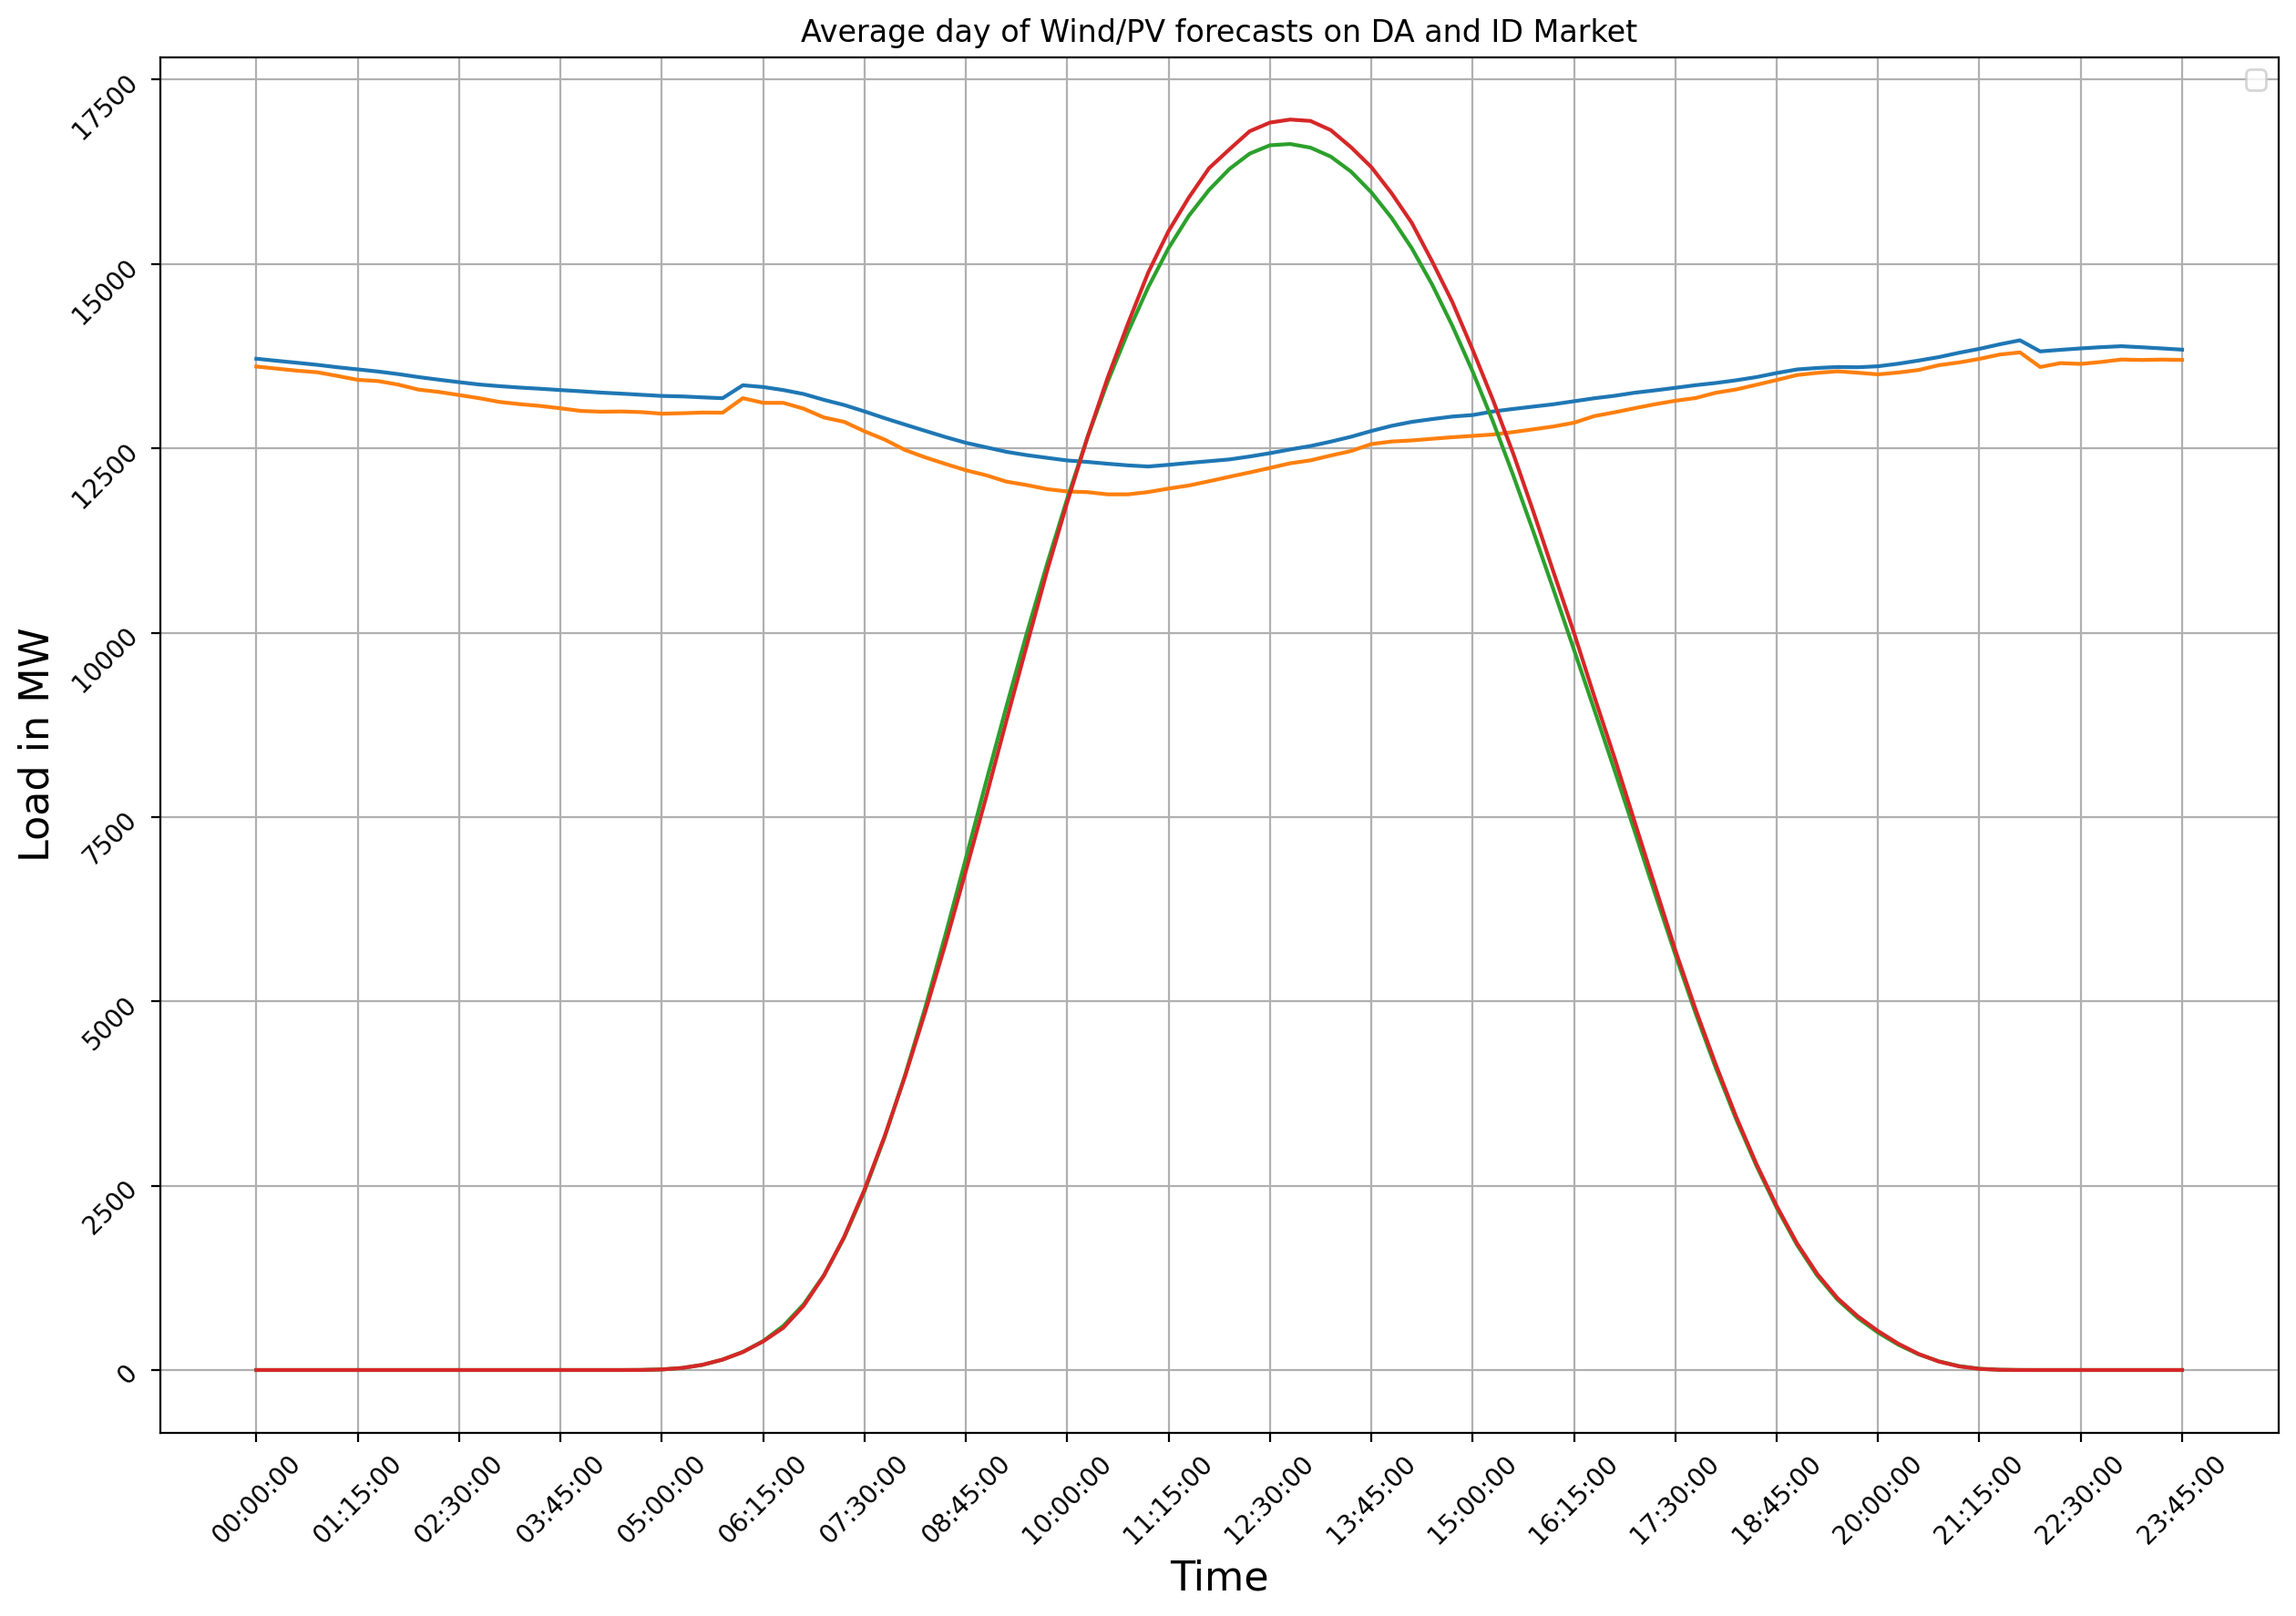

In [89]:
fig, ax = plt.subplots(1,1, figsize=(15,10),dpi=200)
data["search_k"] = data.index.time

for i in range(1,5):
    data_group = data.groupby("search_k").mean()
    ax.plot([str(x) for x in data_group.index], data_group.iloc[:,i])


ax.xaxis.set_major_locator(plt.MaxNLocator(25))
ax.tick_params(labelrotation=45)
ax.set_title("Average day of Wind/PV forecasts on DA and ID Market")
ax.set_ylabel("Load in MW", fontdict={'fontsize':16})
ax.set_xlabel("Time", fontdict={'fontsize':16})
ax.grid()
ax.legend();
    

## Finding the average price for wind and solar energy Day Ahead in 2021

In [16]:
average_value_wind_da = ((data.iloc[:,1]*0.25)*(data.iloc[:,5])).mean()
print (f'The average price for wind using da in 2021 : {average_value_wind_da} Eur/MWh' )
average_value_pv_da = ((data.iloc[:,3]*0.25)*(data.iloc[:,5])).mean()
print (f'The average price for pv using da in 2021 : {average_value_pv_da} Eur/MWh' )



The average value for wind using da in 2021 : 268027.7962228169 Eur/MWh
The average value for pv using da in 2021 : 101153.5543262703 Eur/MWh


## Identifying the highest and lowest days of RE production and their average prices respectively 

In [17]:
data['re_total_da'] = (data.iloc[:,1] + data.iloc[:,3]) * 0.25
data['re_total_id'] = (data.iloc[:,2] + data.iloc[:,4]) * 0.25
data['search_key'] = data.index.date
grouped_data = data.groupby("search_key").sum()

In [18]:
grouped_data

,hour,de_emsys_wind_onoff_da [in MW],de_emsys_wind_onoff_id [in MW],de_emsys_pv_da [in MW],de_emsys_pv_id [in MW],da h [in EUR/MWh],id_qh_p [in EUR/MWh],id_h_p [in EUR/MWh],rebap [in EUR/MWh],re_total_da,re_total_id
search_key,,,,,,,,,,,
2021-01-01,1104,345056,319951,76318,86908,4646.24,4930.465442,4888.643253,3397.85,105343.50,101714.75
2021-01-02,1104,279909,352000,82920,63730,4854.00,4597.863606,4734.413386,1300.84,90707.25,103932.50
2021-01-03,1104,1809365,1758099,36292,28459,3707.76,4169.598870,4032.421180,4359.10,461414.25,446639.50
2021-01-04,1104,1917479,1585648,46122,22959,4609.72,6387.579688,6004.911641,11752.83,490900.25,402151.75
2021-01-05,1104,1739936,1496236,31685,24720,5312.36,6022.260852,5991.833682,7398.79,442905.25,380239.00
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,1104,1955456,1659883,103429,97411,14287.48,15945.716508,15429.924642,18421.10,514721.25,439323.50
2021-12-28,1104,2550427,2150373,46007,59472,10005.68,10759.467784,10673.485113,12769.27,649108.50,552461.25
2021-12-29,1104,1501747,1362231,41094,60641,14937.92,14723.908464,15243.892072,11222.28,385710.25,355718.00


In [49]:
grouped_data.index = pd.to_datetime(grouped_data.index)

In [50]:
grouped_data.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
               '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='search_key', length=365, freq=None)

<AxesSubplot:xlabel='search_key'>

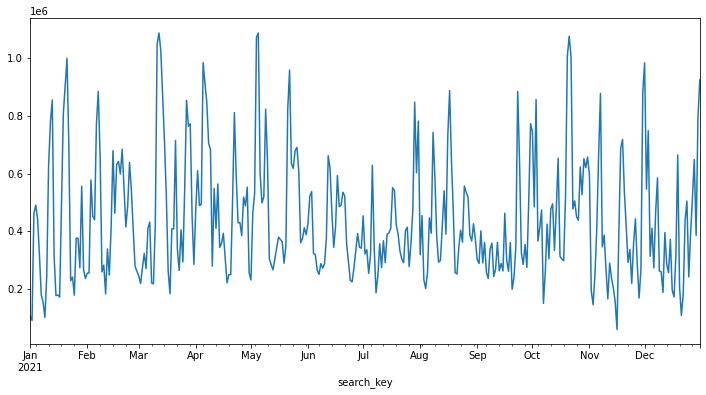

In [62]:
grouped_data['re_total_da'].plot(figsize=(12,6))

In [20]:
grouped_data['re_total_da'].idxmax()


datetime.date(2021, 3, 12)

In [58]:
max_da = grouped_data['re_total_da'].loc['2021-03-12']
print (f'The 12th of ch 2021 was the day with the max renewable energy generated with generated volume of: {max_da} MWh')

The 12th March 2021 was the day with the max renewable energy generated with generated volume of: 1088041.0 MWh


In [55]:
grouped_data['re_total_da'].idxmin()

Timestamp('2021-11-16 00:00:00')

In [59]:
min_da = grouped_data['re_total_da'].loc['2021-11-16']
print (f'The 16th of Nov 2021 was the day with the min renewable energy generated with generated volume of: {min_da} MWh')

The 16th Nov 2021 was the day with the min renewable energy generated with generated volume of: 59199.25 MWh


In [67]:
avg_price_max= data.loc["2021-03-12", "da h [in EUR/MWh]"].mean()
print (f'The 12th of March 2021 was the day with the max renewable energy generated with average re_da price at: {avg_price_max} EUR/MWh')

The 12th of March 2021 was the day with the max renewable energy generated with average re_da price at: 22.286249999999995 EUR/MWh


In [66]:
avg_price_min=data.loc["2021-11-16", "da h [in EUR/MWh]"].mean()
print (f'The 16th of 2021 was the day with the min renewable energy generated with average re_da price at: {avg_price_min} EUR/MWh')

The 16th Nov 2021 was the day with the min renewable energy generated with average re_da price at: 237.46500000000003 EUR/MWh
